# Simpson's Rule

In numerical integration, Simpson's rules are several approximations for definite integrals, named after Thomas Simpson (1710–1761).

The most basic of these rules, called Simpson's 1/3 rule, or just Simpson's rule, reads

$$  \int_a^b f(x) \, dx \approx \frac{h}{6} \left[ y_0 + y_n + 4\sum_{\text{k : odd}} y_k + 2 \sum_{\text{k : even}} y_k \right]. $$

$$ h = \frac{b - a}{n} $$

$n \rightarrow$ number of segments, must be even.

$h \rightarrow$ step size.

## Implementation

We define `simpsons_rule` function. the function takes five inputs, first input is the function to integrate, second and third input are the start and the end of the interval of integration, fourth input is the number of segments, last input is `plot_function` which equals false by default, returns a plot to the function if true.

In [1]:
# import needed packages

import numpy as np

def simpsons_rule(f, start, end, number_of_segments, plot_function = False):
    
    h = (end - start) / number_of_segments
    
    x_data = np.linspace(start, end, number_of_segments + 1)
    
    y_data = []
    for i in x_data:
        y_data.append(f(i))
    
    integration = (h / 3) * (y_data[0] + y_data[-1] + 4 * sum(y_data[1:-1:2]) + 2 * sum(y_data[2:-1:2]))
    
    if plot_function == False:
        
        return integration
    
    if plot_function == True:
        
        data = []
        
        for i in range(len(x_data)):
            data.append((x_data[i], y_data[i]))
            
        function_plot = plot(f, start, end, color = 'blue', figsize = 8)
        
        A = PolynomialRing(RR, 'x')

        polynomial_plot = plot(A.lagrange_polynomial(data), start, end, fill='axis', color='red', figsize = 8)
        
        points_plot = point(data, pointsize = 30, color = '#222222')
        
        return integration, function_plot + polynomial_plot + points_plot
    
        
    
    

## Test with an example

Evaluate the foloowing integral using Simpson's 1/3 rule. Use 8 segments.

$$ \int_0^2 x\cos(e^x)\,dx $$

In [2]:
var('x')

f(x) = x * cos(exp(x))

The definite integral value is -0.13503385368458437, the exact value is -0.135363855350985


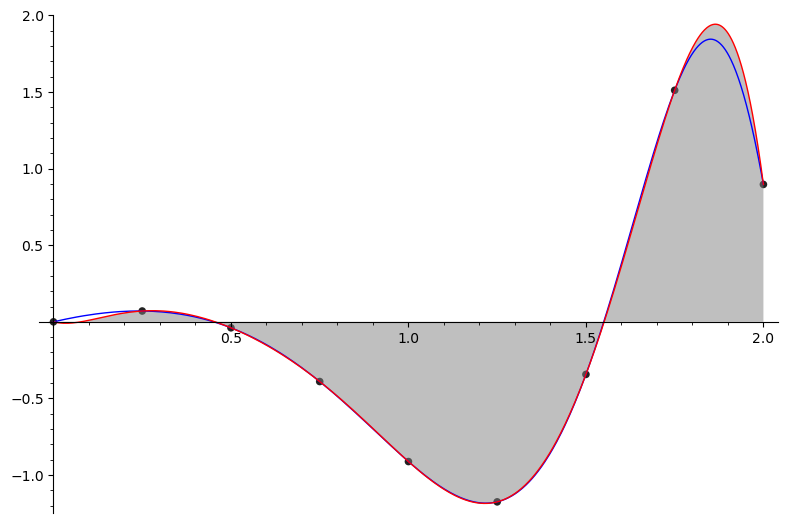

In [3]:
solution, graph = simpsons_rule(f, 0, 2, 8, plot_function = True)

print(f"The definite integral value is {solution}, the exact value is {f.integrate(x, 0, 2).n()}")

show(graph)